## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [19]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


boston = datasets.load_boston()
X = pd.DataFrame(boston.data, columns = boston.feature_names)
y = pd.DataFrame(boston.target, columns = ['MEDV'])

In [2]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [5]:
# Aplicando o train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=52)

In [7]:
# Treinando duas árvores de profundidades diferentes
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=8)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [8]:
path = regr_2.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.00000000e+00, 5.03039105e-16, 1.07315009e-14, 4.42477876e-05,
        5.30973451e-04, 5.94886922e-04, 7.22713864e-04, 7.96460177e-04,
        9.43952802e-04, 9.63618486e-04, 1.06194690e-03, 1.06194690e-03,
        1.78466077e-03, 1.78466077e-03, 1.78466077e-03, 2.13126844e-03,
        2.16814159e-03, 3.77581121e-03, 3.85447394e-03, 3.85447394e-03,
        4.26253687e-03, 4.42477876e-03, 4.42477876e-03, 7.10422812e-03,
        7.44247788e-03, 7.98672566e-03, 8.90223346e-03, 9.63716814e-03,
        9.94591937e-03, 1.04070796e-02, 1.10349066e-02, 1.13667650e-02,
        1.17604298e-02, 1.22910521e-02, 1.30998033e-02, 1.34611603e-02,
        1.41651917e-02, 1.66175025e-02, 1.82940020e-02, 1.94184576e-02,
        2.08210423e-02, 2.21853491e-02, 2.47836775e-02, 3.23915929e-02,
        3.76742520e-02, 3.80113078e-02, 3.82315634e-02, 3.88354340e-02,
        4.25408063e-02, 4.27860303e-02, 5.09734513e-02, 5.14989621e-02,
        5.22676991e-02, 5.62881023e-02, 5.95398230

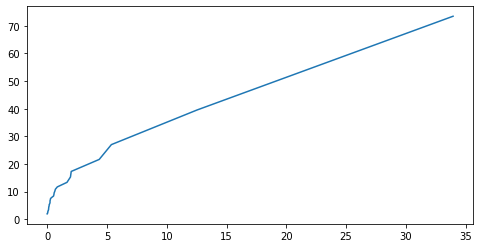

In [13]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(8,4))
plt.plot(ccp_alphas, impurities)

### 3. Para cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [17]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [20]:
train_scores = [mean_squared_error(y_train, clf.predict(X_train)) for clf in clfs]
test_scores = [mean_squared_error(y_test, clf.predict(X_test)) for clf in clfs]

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

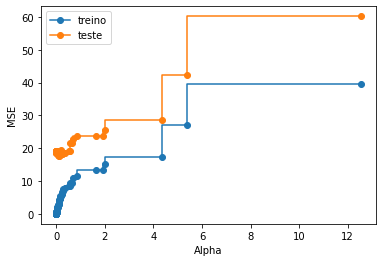

In [29]:
fig, ax = plt.subplots()
ax.set_xlabel('Alpha')
ax.set_ylabel('MSE')

ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', 
        label='treino', drawstyle='steps')

ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', 
        label='teste', drawstyle='steps')
ax.legend()
plt.show()

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [46]:
arvore_final = DecisionTreeRegressor(random_state=0, ccp_alpha=.8)
arvore_final.fit(X_train, y_train)

arvore_final.score(X_test, y_test)

0.7864145017810384

### 7. Visualize esta árvore.

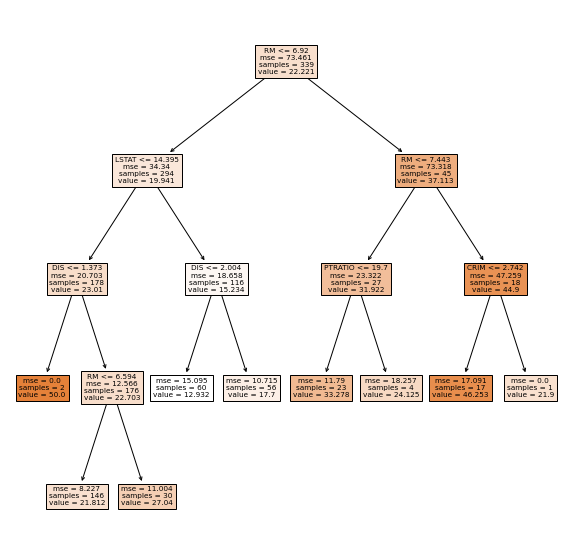

In [47]:
plt.rc('figure', figsize=(10,10))
tp = tree.plot_tree(arvore_final,
                   feature_names=X.columns,
                   filled=True)